In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.preprocessing import normalize

In [2]:
def create_sine(
    steps,
    length=1,
    vertical_shift=1,
    amplitude=1,
    cycles=2
):
    t = np.arange(0.0, length, steps)
    s = vertical_shift*amplitude + np.sin(cycles * np.pi * t)
    return s

In [3]:

def create_square(
    steps,
    length=1,
    vertical_shift=1,
    amplitude=1,
    cycles=2
):
    t = np.arange(0.0, length, steps)
    y = np.array([vertical_shift*amplitude if math.floor(cycles * t_) % cycles == 0 else 0 for t_ in t])
    return y


In [4]:

def add_noise_to(v, noise_amplitude):
    noise = np.random.rand(1, len(v))
    t = np.ones(len(v))
    a_t = np.dot(noise_amplitude, t)
    n_a = noise ** a_t
    return np.add(v, n_a)[0]

[1, 0, -1, -2, -1, -2, -3, -2, -1, 0, -1, -2, -1, -1, -1, 0, -1, -2, -2, -1, 0, 1, 2, 1, 1, 2, 3, 4, 5, 6, 7, 7, 6, 7, 7, 7, 8, 8, 7, 7, 6, 7, 6, 6, 6, 5, 5, 5, 5, 4, 3, 2, 3, 3, 4, 3, 3, 3, 3, 2, 3, 2, 1, 1, 2, 3, 2, 3, 3, 4, 5, 5, 6, 7, 6, 7, 6, 6, 6, 6, 5, 4, 3, 3, 2, 1, 1, 0, 1, 0, -1, 0, -1, -2, -2, -1, -2, -1, 0, -1, 0, 1, 0, -1, -1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 4, 3, 4, 5, 5, 6, 7, 7, 6, 7, 8, 7, 8, 7, 7, 7, 8, 7, 6, 7, 7, 7, 6, 7, 6, 6, 5, 4, 3, 3, 2, 2, 3, 4, 4, 3, 2, 2, 1, 2, 3, 4, 5, 4, 3, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 2, 1, 1, 2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, -1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, -1, 0, -1, 0, -1, -2, -1, -2, -2, -1, -2, -3, -2, -2, -2, -2, -3, -3, -3, -3, -4, -4, -4, -5, -4, -3, -2, -3, -4, -3, -3, -3, -4, -3, -4, -5, -6, -7, -8, -8, -7, -6, -5, -4, -3, -4, -4, -5, -4, -5, -5, -4, -5, -5, -6, -7, -7, -6, -7, -8, -9, -10, -11, -12, -13, -13, -13, -12, -12, -11, -10, -11, -11, -12, -13, -12, -13, -14, -15

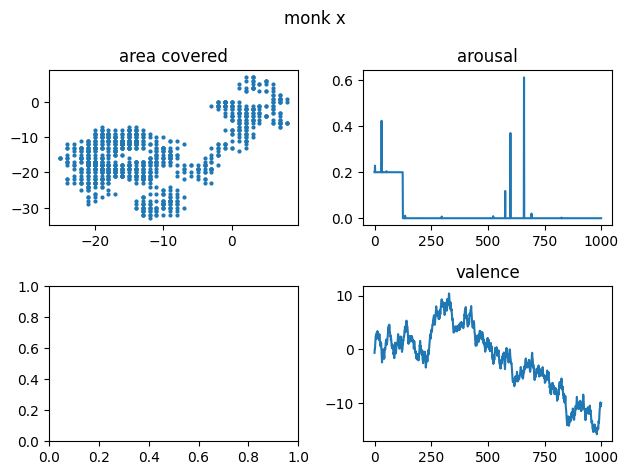

In [5]:
tau = 1000

# Position.
X = []
Y = []
t_a = 0
t_b = 0

# Arousal.
R = []
t_r = 0


# Valence.
V = []
t_v = 0


for t in range(0, tau):
    t_a += random.randint(-1, 1)
    t_b += random.randint(-1, 1)
    X.append(t_a)
    Y.append(t_b)

    t_r = random.random()
    t_v += random.uniform(-1.0, 1.0)
    R.append(t_r)
    V.append(t_v)

print(X)
print(Y)

R = add_noise_to(
    create_square(0.001, 1, 0.2, 1.0, 8),
    R
)

fig, axs = plt.subplots(2, 2)
fig.suptitle('monk x')
axs[0,0].scatter(X,Y,s=4)
axs[0,0].set_title('area covered')
axs[0,1].plot(np.arange(0, len(R)), R)
axs[0,1].set_title('arousal')
axs[1,1].plot(np.arange(0, len(V)), V)
axs[1,1].set_title('valence')
plt.tight_layout()
plt.show()